In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [4]:
from keras.datasets import cifar10
df = cifar10.load_data()

Using TensorFlow backend.


In [5]:
df

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ..., 
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ..., 
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ..., 
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ..., 
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ..., 
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ..., 
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           

In [6]:
df = pd.DataFrame(list(df))

In [7]:
df.head()

,0,1
0,"[[[[59 62 63], [43 46 45], [50 48 43], [68 54 ...","[[6], [9], [9], [4], [1], [1], [2], [7], [8], ..."
1,"[[[[158 112 49], [159 111 47], [165 116 51]...","[[3], [8], [8], [0], [6], [6], [1], [6], [3], ..."


In [33]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
print(X_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ..., 
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ..., 
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ..., 
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ..., 
  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ..., 
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ..., 
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ..., 
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ..., 
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ..., 
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ..., 
   [ 79  82  64]
   [ 68  

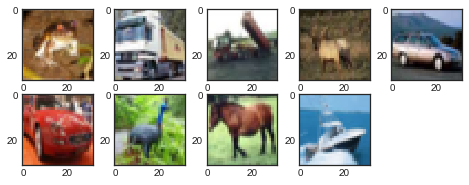

In [12]:
from scipy.misc import toimage
for i in range(0, 9):
    plt.subplot(450 + 1 + i)
    plt.imshow(toimage(X_train[i]))
plt.show()

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
import keras
from keras import backend as K

### Converting y_train and y_test into one hot encoder , eg.  3--> [0,0,0,1,0,0,0,0,0,0]

In [15]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)  #  10 is used because we have to classify images in 10 groups

In [16]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

### Making the model with convolutional layers , maxpool layers and dropout layers to enhance regularization and generalization with further avoidance to overfitting .

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(32 , 32 , 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))      #  10 is used because we have to classify images in 10 groups

In [18]:
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [19]:
model.compile(optimizer = RMSprop(lr=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.0, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [21]:
batch_size = 64
epochs = 7
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

In [22]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[lr_reduce],
                    validation_data=(X_test, y_test),
                    epochs = epochs, verbose = 2)

Epoch 1/7
 - 1151s - loss: 1.5229 - acc: 0.4511 - val_loss: 1.2440 - val_acc: 0.5731
Epoch 2/7
 - 870s - loss: 1.1531 - acc: 0.5892 - val_loss: 1.1511 - val_acc: 0.6084
Epoch 3/7
 - 744s - loss: 1.0134 - acc: 0.6445 - val_loss: 1.0884 - val_acc: 0.6283
Epoch 4/7
 - 741s - loss: 0.9320 - acc: 0.6751 - val_loss: 1.0943 - val_acc: 0.6579
Epoch 5/7
 - 744s - loss: 0.8826 - acc: 0.6924 - val_loss: 0.8618 - val_acc: 0.7021
Epoch 6/7
 - 747s - loss: 0.8384 - acc: 0.7080 - val_loss: 0.9341 - val_acc: 0.6915
Epoch 7/7
 - 841s - loss: 0.8085 - acc: 0.7191 - val_loss: 1.0216 - val_acc: 0.6805

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.


In [23]:
score = model.evaluate(X_test, y_test, verbose=0)
print('valid loss:', score[0])
print('valid accuracy:', score[1])

valid loss: 1.02163387671
valid accuracy: 0.6805


In [25]:
pred = model.predict(X_test)

In [26]:
pred.shape

(10000, 10)

In [27]:
pred

array([[  4.91184837e-05,   1.01892941e-03,   2.93852703e-04, ...,
          3.71340466e-05,   1.17304092e-02,   6.84107235e-03],
       [  3.47500783e-03,   1.68759421e-01,   2.67712352e-07, ...,
          3.43615397e-07,   8.26564848e-01,   1.19908748e-03],
       [  1.07244272e-02,   4.66121852e-01,   2.58376007e-04, ...,
          2.68307980e-04,   5.06115735e-01,   1.55731756e-02],
       ..., 
       [  7.77634268e-05,   1.04554692e-05,   6.53707422e-03, ...,
          9.72411931e-02,   3.97212512e-04,   8.81517917e-05],
       [  3.64261377e-03,   9.83852863e-01,   9.67424829e-04, ...,
          1.42159319e-04,   4.21976292e-05,   2.74491496e-03],
       [  1.18676178e-06,   1.53746922e-04,   2.78069747e-05, ...,
          9.29136634e-01,   1.35037158e-06,   5.59368709e-06]], dtype=float32)

In [28]:
pred_digits = np.argmax(pred , axis = 1)
ImageId = range( 1 , len(pred_digits)+1 )

In [34]:
pred_digits

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [35]:
len(ImageId)

10000

In [36]:
context = {"ImageId" : ImageId , "Label" : pred_digits }
ans = pd.DataFrame(context)

### ans is the predicted dataframe by CNN

In [37]:
ans.head()

,ImageId,Label
0,1,3
1,2,8
2,3,8
3,4,0
4,5,6


### Converting the dataframe to csv file

In [40]:
ans.to_csv("Predictions by CNN.csv", index=None)